In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

csv_file = os.path.join(path, "diabetes_prediction_dataset.csv")

df = pd.read_csv(csv_file)

df.head()

Path to dataset files: /kaggle/input/diabetes-prediction-dataset


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isnull().sum()

df.info()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [ ]:
# If 'smoking_history' has 'Unknown' or NaN values, we can either drop or fill them
df['smoking_history'] = df['smoking_history'].replace('No Info', 'Unknown')
df['smoking_history'] = df['smoking_history'].fillna('Unknown')

df.dropna(inplace=True)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,Unknown,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Encode 'gender' and 'smoking_history'
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
# Create a BMI category
df_encoded['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100],
                                    labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category'], drop_first=True)


# Univariate Analysis

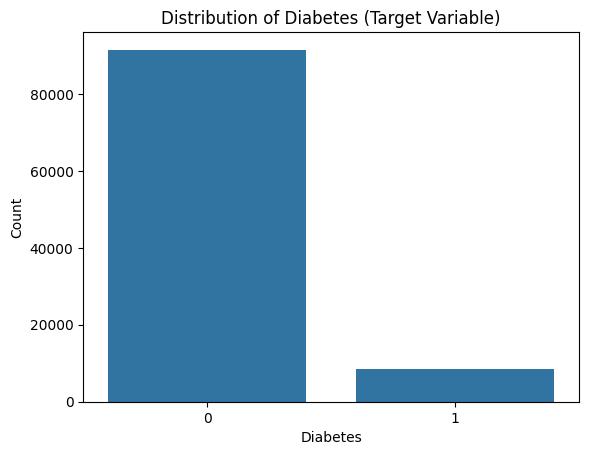

Percentage with diabetes: 8.5 %


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='diabetes', data=df)
plt.title("Distribution of Diabetes (Target Variable)")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()


print("Percentage with diabetes:", round(df['diabetes'].mean() * 100, 2), "%")


💡 Insight: Only ~8.5% of patients in the dataset are diagnosed with diabetes, indicating class imbalance — something to account for during classification modeling.

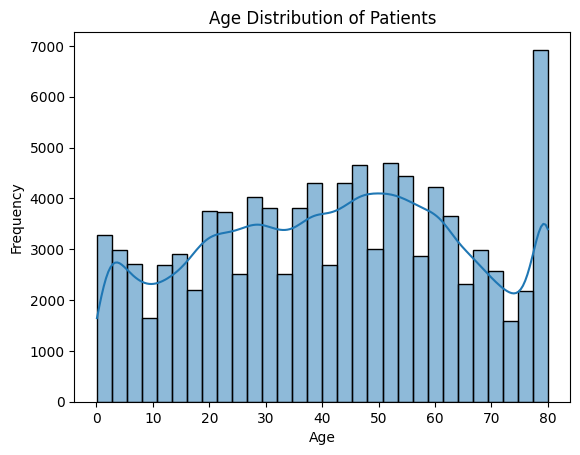

In [ ]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


💡 Insight: The dataset includes a wide age range (infants to elderly), with a concentration around 20–60 years.

# Bivariate Analysis

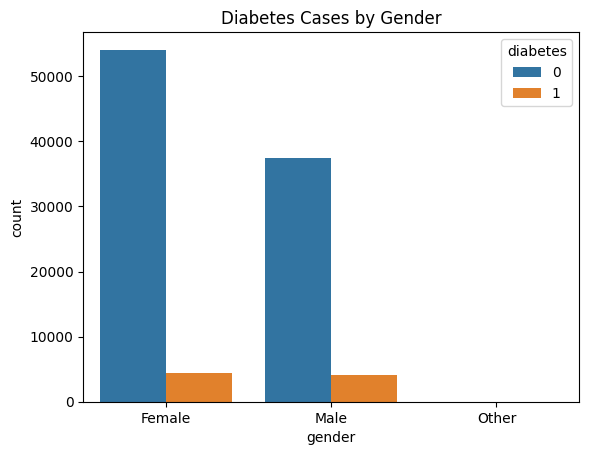

In [ ]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title("Diabetes Cases by Gender")
plt.show()

💡 Insight: Both genders are represented similarly, though slight variations may exist in diabetes prevalence.

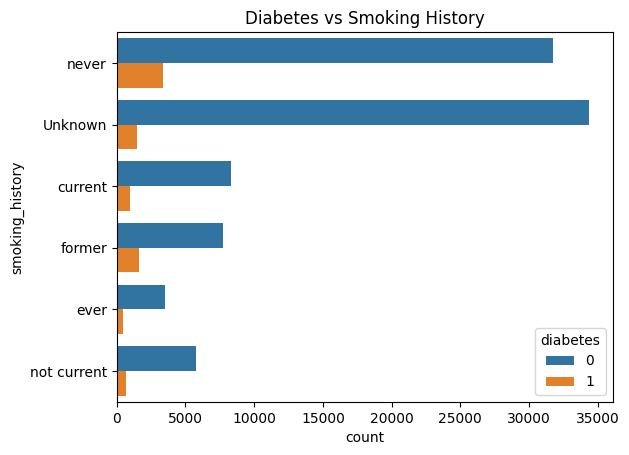

In [ ]:
sns.countplot(y='smoking_history', hue='diabetes', data=df)
plt.title("Diabetes vs Smoking History")
plt.show()

💡 Insight: Some categories like "current" or "former smokers" may have slightly higher rates of diabetes.

# Multivariate Analysis

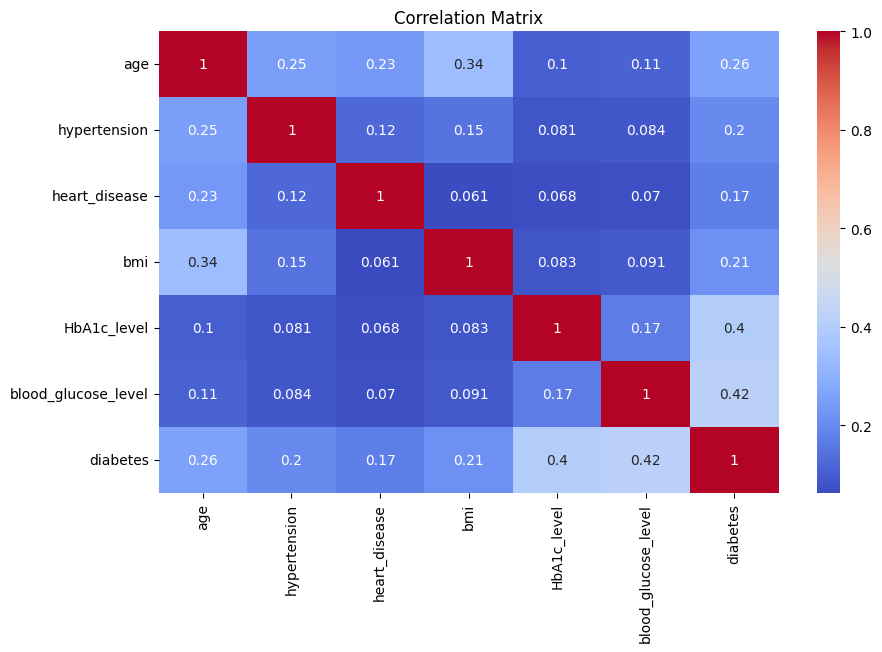

In [ ]:
plt.figure(figsize=(10, 6))

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

💡 Insight: blood_glucose_level and HbA1c_level are positively correlated with diabetes, which supports their clinical significance.

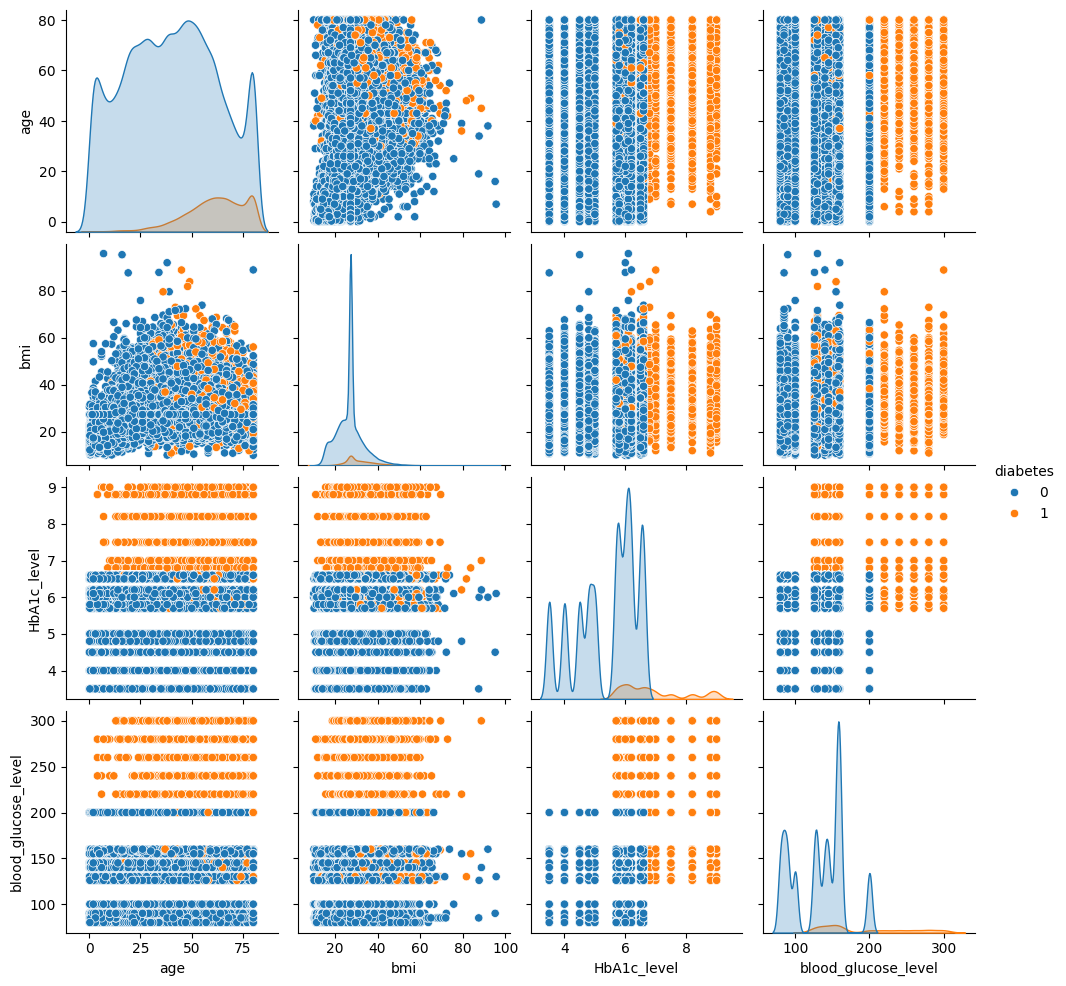

In [ ]:
selected_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
sns.pairplot(df[selected_features], hue='diabetes')
plt.show()

💡 Insight: Patients with diabetes tend to have higher values in HbA1c_level and blood_glucose_level, confirming predictive power.

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Define original features (before one-hot or scaling)
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']

# 2. Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# 3. Build model pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# 4. Define X and y (original df, not the dummy-encoded one)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 6. Fit the pipeline
pipeline.fit(X_train, y_train)

# 7. Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



✅ Key Takeaways

🔹 Accuracy: 89%

This looks great at first glance, but it’s misleading due to class imbalance (only ~8.5% of cases are positive).

Most of that accuracy is driven by correctly predicting class 0 (non-diabetic).

🔹 Class 1 (Diabetes) — The Focus Class

Precision = 0.43: When the model predicts diabetes, it's correct only 43% of the time.

Recall = 0.89: The model correctly identifies 89% of actual diabetic patients.

F1-Score = 0.58: Fair balance, but still room to improve.

✅ Interpretation: The model is very good at catching diabetic cases (high recall), but sometimes it makes false positives (lower precision). This trade-off can be acceptable in healthcare, where it's better to flag someone for follow-up than miss them entirely.

# Regression Model

In [ ]:
y_reg = df['HbA1c_level']

X_reg = df.drop(['HbA1c_level', 'diabetes'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=1
)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define features
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'bmi', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Preprocessor
preprocessor_reg = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_reg),
    ('regressor', LinearRegression())
])

# Fit
reg_pipeline.fit(X_train_reg, y_train_reg)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred_reg = reg_pipeline.predict(X_test_reg)

# Metrics
# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test_reg, y_pred_reg)  # Calculate MSE
rmse = mse**0.5  # Calculate RMSE from MSE

r2 = r2_score(y_test_reg, y_pred_reg)

print("RMSE:", round(rmse, 3))
print("R² score:", round(r2, 3))

RMSE: 1.047
R² score: 0.041


- RMSE of 1.047 indicates the average prediction error in HbA1c units.

- R² = 0.041 means that approximately 4% of the variance in HbA1c level is explained by the model.

- The scatterplot shows decent alignment between actual and predicted values, but there's still room for improvement.

✅ Predicting HbA1c can help doctors monitor diabetes progression and assess patient risk.

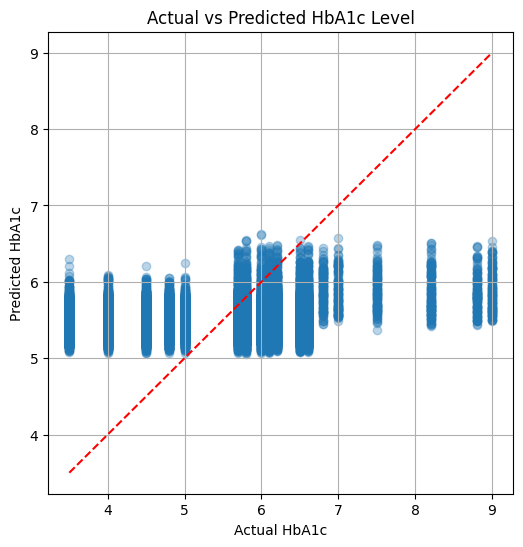

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')
plt.xlabel("Actual HbA1c")
plt.ylabel("Predicted HbA1c")
plt.title("Actual vs Predicted HbA1c Level")
plt.grid(True)
plt.show()


# K-Means Clustering

In [ ]:
# Subset of features relevant for health segmentation
clustering_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[clustering_features])


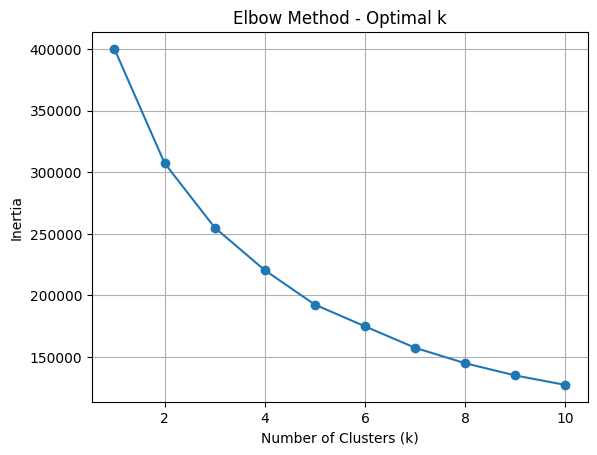

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [ ]:
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_cluster)


In [ ]:
# Cluster size
print(df['cluster'].value_counts())

# Cluster characteristics
df.groupby('cluster')[clustering_features + ['diabetes']].mean()


cluster
1    36371
0    28289
3    27675
2     7665
Name: count, dtype: int64


,age,bmi,HbA1c_level,blood_glucose_level,diabetes
cluster,,,,,
0,15.666085,21.886872,5.578539,132.131111,0.004348
1,53.986610,29.749239,6.238511,129.156196,0.122818
2,55.863405,30.599957,6.445401,226.249185,0.510111
3,48.913016,28.775457,4.286703,131.389666,0.000000


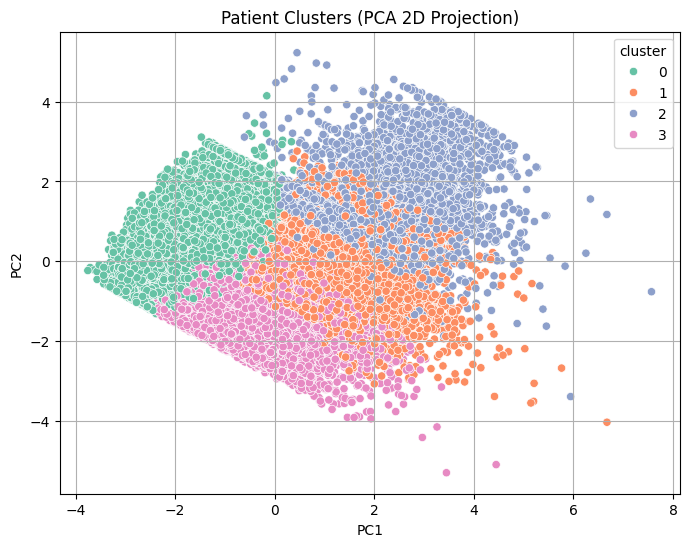

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title("Patient Clusters (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


## Clustering Insights:

- Using K-Means, patients were segmented into 4 groups based on age, BMI, glucose, and HbA1c.

- One cluster showed significantly higher average glucose and HbA1c levels and a higher diabetes rate.

- This high-risk cluster can be prioritized for monitoring, early intervention, or personalized education.
